!pip install selenium
!pip install BeautifulSoup4

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup


import datetime
import pandas as pd
import numpy as np
import time
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


from urllib.request import urlopen
import math
import random

In [2]:
tmp = ""
def getDate(h):
    global tmp
    try :
        tmp = h.parent.find_previous_sibling('td').get_text()
        return tmp
    except:
        return ""


def weekday_(w):
    prpr = {      
        '월': '0',
        '화': '1',
        '수': '2',
        '목': '3',
        '금': '4',
        '토': '5',
        '일': '6',
    }
    for key, value in prpr.items():
        w = w.replace(key, value)
    return w    
    
    
    
    
def month_(m):
    prpr = {     
        '4': '04',
        '5': '05',
        '6': '06',
        '7': '07',
        '8': '08',
        '9': '09',
    }
    for key, value in prpr.items():
        m = m.replace(key, value)
    return m    
    
    
    
def LOCATION_(s):
    prpr = {      
        '잠실': '서울',
        '사직': '부산',
        '고척': '서울',
        '문학': '인천',
        '마산': '창원',
    }
    for key, value in prpr.items():
        s = s.replace(key, value)
    return s    



def team(s):
    prpr = {      
        'kt': 'KT',
        '넥센': '키움',
    }
    for key, value in prpr.items():
        s = s.replace(key, value)
    return s 


In [3]:
sportsInfo = pd.DataFrame(columns=('YEAR','MONTH', 'DAY', 'WEEKDAY', 'HOUR', 'TEAM1','TEAM2', 'STADIUM','LOCATION','WINNER'))

baseUrl = "https://sports.news.naver.com/kbaseball/schedule/index.nhn?month="

    
for m in range (4, 10):
    MonthUrl = baseUrl + str(m)
    for y in range (2017, 2020):
        Url = MonthUrl + '&year=' + str(y) + '&teamCode=' 
        page = urlopen(Url)
        soup = BeautifulSoup(page,"html.parser")

        date =soup.find_all("span",class_='td_date')

        hour =soup.find_all('span', class_="td_hour")
        team_lft =soup.find_all('span', class_="team_lft")   
        score =soup.find_all('strong', class_="td_score")
        team_rgt =soup.find_all('span', class_="team_rgt")

        tempStadium =soup.find_all('span', class_="td_stadium")

        stadium = list()

        for idx, val in enumerate(tempStadium):
            if idx%2 ==1 :
                stadium.append(val)


        for h in hour:
            _hour = h.get_text()

            if '-' in _hour:
                pass
            else:

                _date = getDate(h)   
                if tmp != None:
                    _info = h.parent.find_next_sibling('td').get_text()
                    _stadium = h.parent.next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.find_next_sibling('td').get_text()

                    temp = _info.split('\n\n')
                    _team1 = temp[0]
                    _team1 = _team1.replace(' ','')
                    _team1 = _team1.replace('\n','')
                    
                    _team2 = temp[2].replace(' ','')
                    _team2 =_team2.replace('\n','')
                   

                    _score = temp[1]
                    if (_score != 'VS') and (_team1 != ('드림' or '나눔')):
                        s1 = _score.split(':')[0]
                        s2 = _score.split(':')[1]

                        s1 = int(s1)
                        s2 = int(s2)

                        if s1 > s2:
                            win = _team1
                        if s1 < s2:
                            win = _team2
                        if s1 == s2:
                            win = 0

                        #_score1 = s1
                        #_score2 = s2
                        
                        temp2 = tmp.split('\n')
                        _date = temp2[1]                  
                        _month = month_(_date.split('.')[0])
                        _day =  _date.split('.')[1].split(' ')[0]
                        _hour = _hour.split(':')[0]
                        _weekday = weekday_(_date.split('(')[1].replace(')',''))
                        

                        _stadium = _stadium.replace('\n','')
                        _stadium = _stadium.replace(' ','')
                        _location = _stadium


                        sportsInfo  = pd.DataFrame(np.array([[y, _month, _day, _weekday, _hour, _team1, _team2, _stadium, _location, win]]),
                                                           columns=['YEAR','MONTH', 'DAY', 'WEEKDAY', 'HOUR', 'TEAM1','TEAM2','STADIUM','LOCATION','WINNER']).append(sportsInfo , ignore_index=True)
                    else:
                        pass
                else:
                    pass


        time.sleep(random.randrange(2, 5))  
        
sportsInfo.LOCATION = sportsInfo.LOCATION.apply(LOCATION_)
sportsInfo.TEAM1 = sportsInfo.TEAM1.apply(team)
sportsInfo.TEAM2 = sportsInfo.TEAM2.apply(team)
sportsInfo.WINNER = sportsInfo.WINNER.apply(team)

In [4]:
sportsInfo.to_csv('./sportsInfo.csv',index=False)

In [5]:
data_ = pd.read_csv('./sportsInfo.csv')

In [6]:
data_

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER
0,2019,9,30,0,18,SK,한화,대전,대전,SK
1,2019,9,30,0,18,롯데,LG,잠실,서울,LG
2,2019,9,29,6,14,키움,롯데,사직,부산,키움
3,2019,9,29,6,14,삼성,KT,수원,수원,KT
4,2019,9,29,6,14,SK,한화,대전,대전,SK
...,...,...,...,...,...,...,...,...,...,...
2031,2017,4,1,5,17,롯데,NC,마산,창원,롯데
2032,2017,4,1,5,17,KT,SK,문학,인천,KT
2033,2017,4,1,5,14,LG,키움,고척,서울,LG
2034,2017,4,1,5,14,KIA,삼성,대구,대구,KIA


In [7]:
weather_  = glob.glob('./data/*.csv')
weather_total =pd.DataFrame(columns=('지점','일시','기온(°C)', '강수량(mm)', '풍속(m/s)','습도(%)'))

for x in weather_:
    print(x)
    Data = pd.read_csv(x, encoding='CP949')
    weather_total = pd.merge(Data,weather_total , how='outer') 
    


./data\weather2017.csv
./data\weather2018.csv
./data\weather2019.csv


In [8]:
weather_total

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,서울,2019-04-01 01:00,1.8,NaN,0.7,44.0
1,108,서울,2019-04-01 02:00,1.2,NaN,0.6,50.0
2,108,서울,2019-04-01 03:00,0.7,NaN,0.6,53.0
3,108,서울,2019-04-01 04:00,0.4,NaN,0.8,55.0
4,108,서울,2019-04-01 05:00,0.6,NaN,1.2,58.0
...,...,...,...,...,...,...,...
105377,159,부산,2017-09-30 19:00,20.2,NaN,1.0,56.0
105378,159,부산,2017-09-30 20:00,19.5,NaN,1.2,56.0
105379,159,부산,2017-09-30 21:00,19.1,NaN,1.8,61.0
105380,159,부산,2017-09-30 22:00,19.1,NaN,2.6,63.0


In [9]:
del weather_total['지점']

weather_total.rename(columns= {
                          '지점명':'LOCATION',
                          '일시':'TIME',
                          '기온(°C)': 'TEMPERATURE',
                          '강수량(mm)' :'RAINFALL',
                          '풍속(m/s)' : 'WINDSPEED',
                          '습도(%)' :'HUMLDITY'
                             }, inplace=True)

In [10]:
def get_new_date(date):
    prpr = {
        '-' : '',
        ':' : '',
        ' ' : '',
    }
    
    for key, value in prpr.items():
        date = date.replace(key, value)
    return date

In [11]:
weather_total.TIME = weather_total.TIME.apply(get_new_date)
weather_total = weather_total.fillna('0')
weather_total.head()

,LOCATION,TIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,서울,201904010100,1.8,0,0.7,44
1,서울,201904010200,1.2,0,0.6,50
2,서울,201904010300,0.7,0,0.6,53
3,서울,201904010400,0.4,0,0.8,55
4,서울,201904010500,0.6,0,1.2,58


In [12]:
weather_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105382 entries, 0 to 105381
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LOCATION     105382 non-null  object 
 1   TIME         105382 non-null  object 
 2   TEMPERATURE  105382 non-null  float64
 3   RAINFALL     105382 non-null  object 
 4   WINDSPEED    105382 non-null  object 
 5   HUMLDITY     105382 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.6+ MB


In [13]:
weather_total['TIME'] = weather_total['TIME'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
weather_total['YEAR'] = weather_total['TIME'].dt.strftime('%Y').astype('int')
weather_total['MONTH'] = weather_total['TIME'].dt.strftime('%m').astype('int')
weather_total['DAY'] = weather_total['TIME'] .dt.strftime('%d').astype('int')
weather_total['HOUR'] = weather_total['TIME'] .dt.strftime('%H').astype('int')

del weather_total['TIME'] 

In [14]:
weather_total['TEMPERATURE'] = weather_total['TEMPERATURE'] .astype('int')
weather_total['WINDSPEED'] = weather_total['WINDSPEED'] .astype('int')
weather_total['HUMLDITY'] = weather_total['HUMLDITY'] .astype('int')

In [15]:
weather_total['LOCATION'] = weather_total['LOCATION'] .astype('str')
weather_total['RAINFALL'] = weather_total['RAINFALL'] .astype('int')

In [16]:
weather_total.head()

,LOCATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,YEAR,MONTH,DAY,HOUR
0,서울,1,0,0,44,2019,4,1,1
1,서울,1,0,0,50,2019,4,1,2
2,서울,0,0,0,53,2019,4,1,3
3,서울,0,0,0,55,2019,4,1,4
4,서울,0,0,1,58,2019,4,1,5


In [17]:
weather_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105382 entries, 0 to 105381
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   LOCATION     105382 non-null  object
 1   TEMPERATURE  105382 non-null  int32 
 2   RAINFALL     105382 non-null  int32 
 3   WINDSPEED    105382 non-null  int32 
 4   HUMLDITY     105382 non-null  int32 
 5   YEAR         105382 non-null  int32 
 6   MONTH        105382 non-null  int32 
 7   DAY          105382 non-null  int32 
 8   HOUR         105382 non-null  int32 
dtypes: int32(8), object(1)
memory usage: 4.8+ MB


In [18]:
weather_total.to_csv('./weathertotal.csv',index=False)

In [19]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      2036 non-null   int64 
 1   MONTH     2036 non-null   int64 
 2   DAY       2036 non-null   int64 
 3   WEEKDAY   2036 non-null   int64 
 4   HOUR      2036 non-null   int64 
 5   TEAM1     2036 non-null   object
 6   TEAM2     2036 non-null   object
 7   STADIUM   2036 non-null   object
 8   LOCATION  2036 non-null   object
 9   WINNER    2036 non-null   object
dtypes: int64(5), object(5)
memory usage: 159.2+ KB


In [20]:
data_['TEAM1'] = data_['TEAM1'] .astype('str')
data_['TEAM2'] = data_['TEAM2'] .astype('str')
data_['STADIUM'] = data_['STADIUM'] .astype('str')
data_['LOCATION'] = data_['LOCATION'] .astype('str')

In [21]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      2036 non-null   int64 
 1   MONTH     2036 non-null   int64 
 2   DAY       2036 non-null   int64 
 3   WEEKDAY   2036 non-null   int64 
 4   HOUR      2036 non-null   int64 
 5   TEAM1     2036 non-null   object
 6   TEAM2     2036 non-null   object
 7   STADIUM   2036 non-null   object
 8   LOCATION  2036 non-null   object
 9   WINNER    2036 non-null   object
dtypes: int64(5), object(5)
memory usage: 159.2+ KB


In [22]:
totalData= pd.merge(data_,weather_total, how='inner')
totalData.head()

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,SK,한화,대전,대전,SK,25,0,0,65
1,2019,9,30,0,18,롯데,LG,잠실,서울,LG,26,0,2,52
2,2019,9,29,6,14,키움,롯데,사직,부산,키움,27,0,3,79
3,2019,9,29,6,14,삼성,KT,수원,수원,KT,27,0,3,37
4,2019,9,29,6,14,SK,한화,대전,대전,SK,28,0,2,50


In [23]:
totalData.info

<bound method DataFrame.info of       YEAR  MONTH  DAY  WEEKDAY  HOUR TEAM1 TEAM2 STADIUM LOCATION WINNER  \
0     2019      9   30        0    18    SK    한화      대전       대전     SK   
1     2019      9   30        0    18    롯데    LG      잠실       서울     LG   
2     2019      9   29        6    14    키움    롯데      사직       부산     키움   
3     2019      9   29        6    14    삼성    KT      수원       수원     KT   
4     2019      9   29        6    14    SK    한화      대전       대전     SK   
...    ...    ...  ...      ...   ...   ...   ...     ...      ...    ...   
1973  2017      4    1        5    17    롯데    NC      마산       창원     롯데   
1974  2017      4    1        5    17    KT    SK      문학       인천     KT   
1975  2017      4    1        5    14    LG    키움      고척       서울     LG   
1976  2017      4    1        5    14    한화    두산      잠실       서울     한화   
1977  2017      4    1        5    14   KIA    삼성      대구       대구    KIA   

      TEMPERATURE  RAINFALL  WINDSPEED  HUM

In [24]:
totalData.to_csv('./totalData.csv',index=False)

# Teat Data

In [111]:
Info20 = pd.DataFrame(columns=('YEAR','MONTH', 'DAY', 'WEEKDAY', 'HOUR', 'TEAM1','TEAM2' 'STADIUM','LOCATION','WINNER'))

baseUrl = "https://sports.news.naver.com/kbaseball/schedule/index.nhn?month="


data_ = data_.dropna(axis=0)
data_.LOCATION = data_.LOCATION.apply(LOCATION_)
data_.head()    
    
    
    
for m in range (4, 10):
    MonthUrl = baseUrl + str(m)
    Url = MonthUrl + '&year=2020' + '&teamCode=' 
    page = urlopen(Url)
    soup = BeautifulSoup(page,"html.parser")

    date =soup.find_all("span",class_='td_date')

    hour =soup.find_all('span', class_="td_hour")
    team_lft =soup.find_all('span', class_="team_lft")   
    score =soup.find_all('strong', class_="td_score")
    team_rgt =soup.find_all('span', class_="team_rgt")

    tempStadium =soup.find_all('span', class_="td_stadium")

    stadium = list()

    for idx, val in enumerate(tempStadium):
        if idx%2 ==1 :
            stadium.append(val)


    for h in hour:
        _hour = h.get_text()

        if '-' in _hour:
            pass
        else:

            _date = getDate(h)   
            if tmp != None:
                _info = h.parent.find_next_sibling('td').get_text()
                _stadium = h.parent.next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.find_next_sibling('td').get_text()

                temp = _info.split('\n\n')
                _team1 = temp[0]                                    
                _team2 = temp[2].replace(' ','')
                _team2 =_team2.replace('\n','')
                                                           
                _score = temp[1]
                if (_score != 'VS') and (_team1 != ('드림' or '나눔')):
                    s1 = _score.split(':')[0]
                    s2 = _score.split(':')[1]

                    s1 = int(s1)
                    s2 = int(s2)

                    if s1 > s2:
                        win = _team1
                    if s1 < s2:
                        win = _team2
                    if s1 == s2:
                        win = 0

                    #_score1= s1
                    #_score2 = s2
                    temp2 = tmp.split('\n')
                    _date = temp2[1]                  
                    _month = month_(_date.split('.')[0])
                    _day =  _date.split('.')[1].split(' ')[0]
                    _hour = _hour.split(':')[0]
                    _weekday = weekday_(_date.split('(')[1].replace(')',''))
                    _stadium = _stadium.replace('\n','')
                    _location = _stadium

                    Info20  = pd.DataFrame(np.array([['2020', _month, _day, _weekday, _hour, _team1, _team2,_stadium, _location, win]]),
                                                           columns=['YEAR','MONTH', 'DAY', 'WEEKDAY', 'HOUR', 'TEAM1','TEAM2','STADIUM','LOCATION','WINNER']).append(Info20, ignore_index=True)
                else:
                    pass
            else:
                pass


    time.sleep(random.randrange(2, 5))  
        
Info20.LOCATION = Info20.LOCATION.apply(LOCATION_)

In [112]:
Info20

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,SCORE1,SCORE2,STADIUM,LOCATION,WINNER
0,2020,06,2,1,18,키움,한화,15,3,대전,대전,키움
1,2020,06,2,1,18,삼성,LG,2,0,잠실,서울,삼성
2,2020,06,2,1,18,SK,NC,8,2,창원,창원,SK
3,2020,06,2,1,18,두산,KT,11,8,수원,수원,두산
4,2020,06,2,1,18,롯데,KIA,2,7,광주,광주,KIA
...,...,...,...,...,...,...,...,...,...,...,...,...
147,2020,04,21,1,18,롯데,NC,8,0,창원,창원,롯데
148,2020,04,21,1,14,키움,SK,3,6,문학,인천,SK
149,2020,04,21,1,14,삼성,KIA,4,2,광주,광주,삼성
150,2020,04,21,1,14,두산,LG,2,5,잠실,서울,LG


In [113]:
Info20.to_csv('./Info20.csv',index=False)
data20 = pd.read_csv('./Info20.csv')

In [114]:
weather_total20 = pd.read_csv('./data/data2020/data2020.csv', encoding='CP949')

In [115]:
del weather_total20['지점']

weather_total20.rename(columns= {
                          '지점명':'LOCATION',
                          '일시':'TIME',
                          '기온(°C)': 'TEMPERATURE',
                          '강수량(mm)' :'RAINFALL',
                          '풍속(m/s)' : 'WINDSPEED',
                          '습도(%)' :'HUMLDITY'
                             }, inplace=True)

In [116]:
weather_total20.TIME = weather_total20.TIME.apply(get_new_date)
weather_total20 = weather_total20.fillna('0')
weather_total20.head()

,LOCATION,TIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,서울,202004010100,11.3,0,4.4,44
1,서울,202004010200,11.0,0,3.1,42
2,서울,202004010300,11.1,0,2.4,36
3,서울,202004010400,10.6,0,3.3,39
4,서울,202004010500,10.1,0,3.5,40


In [117]:
weather_total20['TIME'] = weather_total20['TIME'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
weather_total20['YEAR'] = weather_total20['TIME'].dt.strftime('%Y').astype('int')
weather_total20['MONTH'] = weather_total20['TIME'].dt.strftime('%m').astype('int')
weather_total20['DAY'] = weather_total20['TIME'] .dt.strftime('%d').astype('int')
weather_total20['HOUR'] = weather_total20['TIME'] .dt.strftime('%H').astype('int')

del weather_total20['TIME'] 

weather_total20['TEMPERATURE'] = weather_total20['TEMPERATURE'] .astype('int')
weather_total20['WINDSPEED'] = weather_total20['WINDSPEED'] .astype('int')
weather_total20['HUMLDITY'] = weather_total20['HUMLDITY'] .astype('int')


weather_total20['LOCATION'] = weather_total20['LOCATION'] .astype('str')
weather_total20['RAINFALL'] = weather_total20['RAINFALL'] .astype('int')

In [118]:
weather_total20.to_csv('./weather20.csv',index=False)

In [119]:
weather_total20.head()

,LOCATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,YEAR,MONTH,DAY,HOUR
0,서울,11,0,4,44,2020,4,1,1
1,서울,11,0,3,42,2020,4,1,2
2,서울,11,0,2,36,2020,4,1,3
3,서울,10,0,3,39,2020,4,1,4
4,서울,10,0,3,40,2020,4,1,5


In [120]:
totalData20= pd.merge(data20,weather_total20, left_on=['YEAR','MONTH','DAY', 'HOUR','LOCATION'],
            right_on=['YEAR','MONTH','DAY', 'HOUR','LOCATION'])


In [121]:
totalData20.head(10)

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,SCORE1,SCORE2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2020,5,31,6,14,NC,삼성,18,7,대구,대구,NC,27,0,2,38
1,2020,5,31,6,14,롯데,두산,8,3,잠실,서울,롯데,27,0,2,45
2,2020,5,31,6,14,KT,키움,12,8,고척,서울,KT,27,0,2,45
3,2020,5,31,6,14,LG,KIA,13,5,광주,광주,LG,22,0,4,68
4,2020,5,31,6,14,한화,SK,4,6,문학,인천,SK,22,0,4,49
5,2020,5,30,5,17,NC,삼성,1,9,대구,대구,삼성,26,0,2,39
6,2020,5,30,5,17,롯데,두산,4,5,잠실,서울,두산,28,0,2,41
7,2020,5,30,5,17,KT,키움,3,14,고척,서울,키움,28,0,2,41
8,2020,5,30,5,17,한화,SK,3,9,문학,인천,SK,25,0,2,46
9,2020,5,30,5,14,LG,KIA,6,10,광주,광주,KIA,24,0,2,41


In [122]:
totalData20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         147 non-null    int64 
 1   MONTH        147 non-null    int64 
 2   DAY          147 non-null    int64 
 3   WEEKDAY      147 non-null    int64 
 4   HOUR         147 non-null    int64 
 5   TEAM1        147 non-null    object
 6   TEAM2        147 non-null    object
 7   SCORE1       147 non-null    int64 
 8   SCORE2       147 non-null    int64 
 9   STADIUM      147 non-null    object
 10  LOCATION     147 non-null    object
 11  WINNER       147 non-null    object
 12  TEMPERATURE  147 non-null    int32 
 13  RAINFALL     147 non-null    int32 
 14  WINDSPEED    147 non-null    int32 
 15  HUMLDITY     147 non-null    int32 
dtypes: int32(4), int64(7), object(5)
memory usage: 17.2+ KB


In [123]:
totalData20.to_csv('./totalData20.csv',index=False)

In [124]:
data20 = pd.read_csv('./totalData20.csv')

In [125]:
data20

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,SCORE1,SCORE2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2020,5,31,6,14,NC,삼성,18,7,대구,대구,NC,27,0,2,38
1,2020,5,31,6,14,롯데,두산,8,3,잠실,서울,롯데,27,0,2,45
2,2020,5,31,6,14,KT,키움,12,8,고척,서울,KT,27,0,2,45
3,2020,5,31,6,14,LG,KIA,13,5,광주,광주,LG,22,0,4,68
4,2020,5,31,6,14,한화,SK,4,6,문학,인천,SK,22,0,4,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2020,4,21,1,18,롯데,NC,8,0,창원,창원,롯데,13,0,2,17
143,2020,4,21,1,14,키움,SK,3,6,문학,인천,SK,8,0,8,30
144,2020,4,21,1,14,삼성,KIA,4,2,광주,광주,삼성,13,0,5,19
145,2020,4,21,1,14,두산,LG,2,5,잠실,서울,LG,9,0,8,34


In [126]:
data = pd.read_csv('./totalData.csv')

In [127]:
data_DS = data[data['WINNER'].isin(['두산'])]
data_DS 

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,SCORE1,SCORE2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
5,2019,9,29,6,14,두산,LG,3,0,잠실,서울,두산,27,0,3,31
9,2019,9,28,5,17,한화,두산,6,7,잠실,서울,두산,28,0,2,41
12,2019,9,26,3,18,두산,삼성,11,0,대구,대구,두산,23,0,3,65
17,2019,9,25,2,18,두산,롯데,7,0,사직,부산,두산,21,0,3,65
28,2019,9,21,5,17,KIA,두산,3,5,잠실,서울,두산,20,0,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2017,4,15,5,17,두산,NC,11,2,마산,창원,두산,21,0,5,61
1926,2017,4,14,4,18,두산,NC,10,6,마산,창원,두산,17,0,5,68
1941,2017,4,11,1,18,KIA,두산,4,16,잠실,서울,두산,18,0,4,37
1963,2017,4,4,1,19,두산,KT,2,0,수원,수원,두산,15,0,2,36


In [128]:
data_DS['COUNT'] = 1 

In [44]:
data_DS.to_csv('./data_DS.csv',index=False)

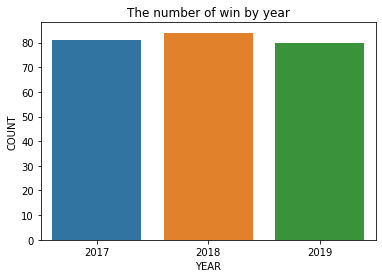

In [67]:
group_month = data_DS.groupby(['YEAR'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['YEAR'], y =group_month['COUNT'])
ax.set(xlabel='YEAR', ylabel='COUNT')
month = ['2017', '2018', '2019']
plt.xticks(np.arange(3), month)
plt.title('The number of win by year')
plt.show()

In [68]:
group_month

,YEAR,COUNT
0,2017,81
1,2018,84
2,2019,80


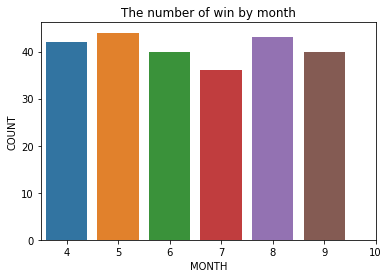

In [73]:
group_month = data_DS.groupby(['MONTH'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['MONTH'], y =group_month['COUNT'])
ax.set(xlabel='MONTH', ylabel='COUNT')
month = ['4', '5', '6', '7', '8', '9', '10']
plt.xticks(np.arange(7), month)
plt.title('The number of win by month')
plt.show()

In [74]:
group_month

,MONTH,COUNT
0,4,42
1,5,44
2,6,40
3,7,36
4,8,43
5,9,40


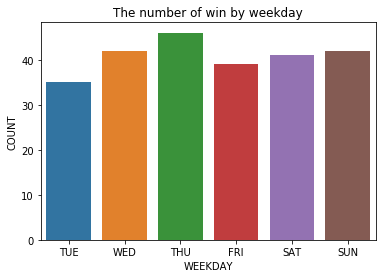

In [47]:
group_month = data_DS.groupby(['WEEKDAY'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['WEEKDAY'], y =group_month['COUNT'])
ax.set(xlabel='WEEKDAY', ylabel='COUNT')
month = [ 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
plt.xticks(np.arange(6), month)
plt.title('The number of win by weekday')
plt.show()

In [72]:
group_month

,MONTH,COUNT
0,4,42
1,5,44
2,6,40
3,7,36
4,8,43
5,9,40


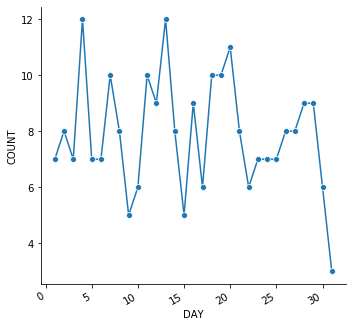

In [79]:
group_hr = data_DS.groupby(['DAY'])['COUNT'].sum().reset_index()
g = sns.relplot(x="DAY", y="COUNT", kind="line", data=group_hr, marker='o')
g.fig.autofmt_xdate()

In [81]:
group_hr

,DAY,COUNT
0,1,7
1,2,8
2,3,7
3,4,12
4,5,7
5,6,7
6,7,10
7,8,8
8,9,5
9,10,6


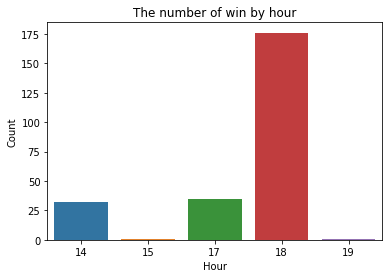

In [50]:
group_hr = data_DS.groupby(['HOUR'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['COUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of win by hour')
plt.show()

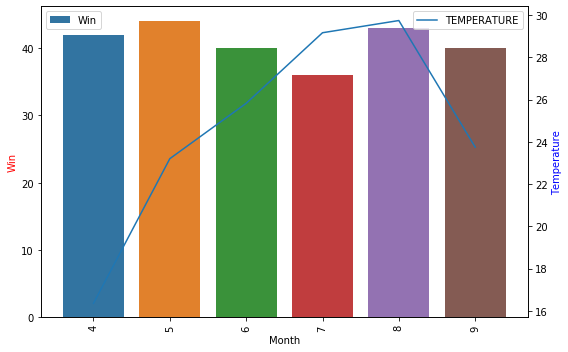

In [51]:
usrNum = data_DS.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_DS[['MONTH','TEMPERATURE']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['TEMPERATURE'].plot()
ax1.set(xlabel='DATE', ylabel='TEMPERATURE', label='Temperature')
ax1.set_ylabel('Temperature', color='b')

ax1.legend()

fig.tight_layout()
plt.show()

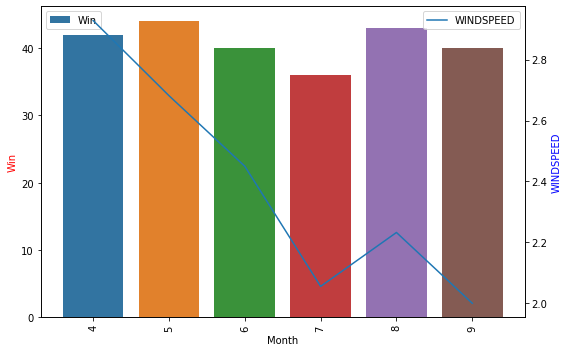

In [85]:
usrNum = data_DS.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_DS[['MONTH','WINDSPEED']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['WINDSPEED'].plot()
ax1.set(xlabel='DATE', ylabel='WINDSPEED', label='WINDSPEED')
ax1.set_ylabel('WINDSPEED', color='b')

ax1.legend()

fig.tight_layout()
plt.show()

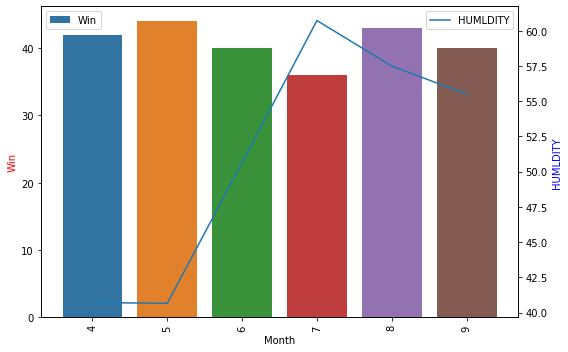

In [87]:
usrNum = data_DS.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_DS[['MONTH','HUMLDITY']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['HUMLDITY'].plot()
ax1.set(xlabel='DATE', ylabel='HUMLDITY', label='HUMLDITY')
ax1.set_ylabel('HUMLDITY', color='b')

ax1.legend()

fig.tight_layout()
plt.show()

In [52]:
data_HH = data[data['WINNER'].isin(['한화'])]
data_HH['COUNT'] = 1 
data_HH 

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,SCORE,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,COUNT
15,2019,9,26,3,18,한화,NC,4:2,창원,창원,한화,23,0,0,64,1
18,2019,9,25,2,18,한화,NC,3:2,창원,창원,한화,21,0,0,68,1
25,2019,9,23,0,18,한화,LG,9:1,잠실,서울,한화,23,0,2,43,1
30,2019,9,20,4,18,삼성,한화,3:5,대전,대전,한화,21,0,3,68,1
39,2019,9,17,1,18,키움,한화,0:1,대전,대전,한화,26,0,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,2017,4,12,2,18,한화,삼성,5:3,대구,대구,한화,18,0,5,15,1
1942,2017,4,11,1,18,한화,삼성,11:8,대구,대구,한화,18,0,4,42,1
1952,2017,4,8,5,17,한화,KIA,4:3,광주,광주,한화,22,0,1,41,1
1967,2017,4,4,1,18,NC,한화,0:6,대전,대전,한화,20,0,1,24,1


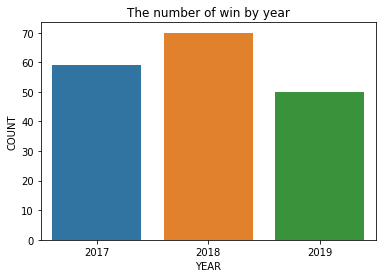

In [69]:
group_month = data_HH.groupby(['YEAR'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['YEAR'], y =group_month['COUNT'])
ax.set(xlabel='YEAR', ylabel='COUNT')
month = ['2017', '2018', '2019']
plt.xticks(np.arange(3), month)
plt.title('The number of win by year')
plt.show()

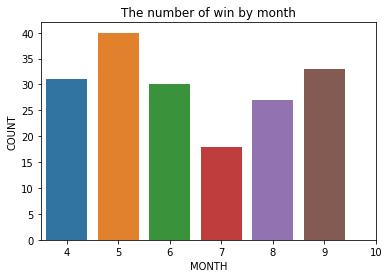

In [75]:
group_month = data_HH.groupby(['MONTH'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['MONTH'], y =group_month['COUNT'])
ax.set(xlabel='MONTH', ylabel='COUNT')
month = ['4', '5', '6', '7', '8', '9', '10']
plt.xticks(np.arange(7), month)
plt.title('The number of win by month')
plt.show()

In [76]:
group_month

,MONTH,COUNT
0,4,31
1,5,40
2,6,30
3,7,18
4,8,27
5,9,33


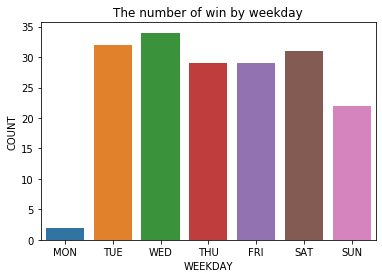

In [77]:
group_month = data_HH.groupby(['WEEKDAY'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['WEEKDAY'], y =group_month['COUNT'])
ax.set(xlabel='WEEKDAY', ylabel='COUNT')
month = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT','SUN']
plt.xticks(np.arange(7), month)
plt.title('The number of win by weekday')
plt.show()

In [78]:
group_month 

,WEEKDAY,COUNT
0,0,2
1,1,32
2,2,34
3,3,29
4,4,29
5,5,31
6,6,22


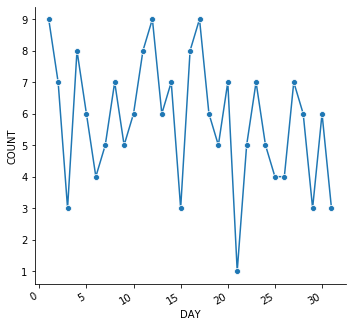

In [82]:
group_hr = data_HH.groupby(['DAY'])['COUNT'].sum().reset_index()
g = sns.relplot(x="DAY", y="COUNT", kind="line", data=group_hr, marker='o')
g.fig.autofmt_xdate()

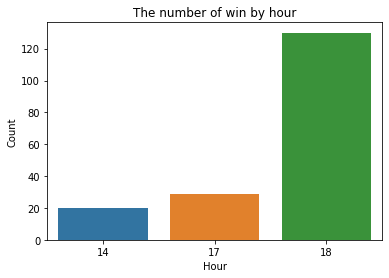

In [58]:
group_hr = data_HH.groupby(['HOUR'])['COUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['COUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of win by hour')
plt.show()

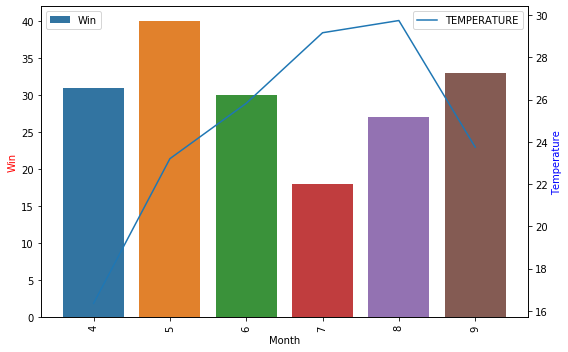

In [59]:
usrNum = data_HH.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_DS[['MONTH','TEMPERATURE']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['TEMPERATURE'].plot()
ax1.set(xlabel='DATE', ylabel='TEMPERATURE', label='Temperature')
ax1.set_ylabel('Temperature', color='b')

ax1.legend()

fig.tight_layout()
plt.show()


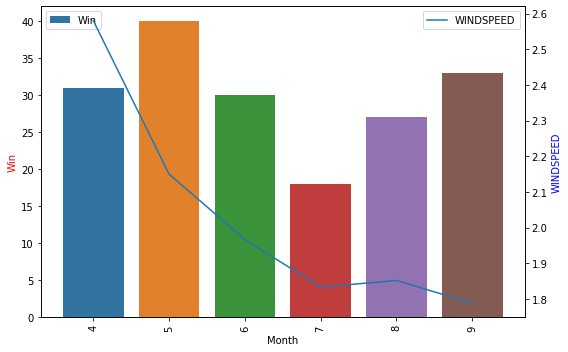

In [86]:
usrNum = data_HH.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_HH[['MONTH','WINDSPEED']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['WINDSPEED'].plot()
ax1.set(xlabel='DATE', ylabel='WINDSPEED', label='WINDSPEED')
ax1.set_ylabel('WINDSPEED', color='b')

ax1.legend()

fig.tight_layout()
plt.show()

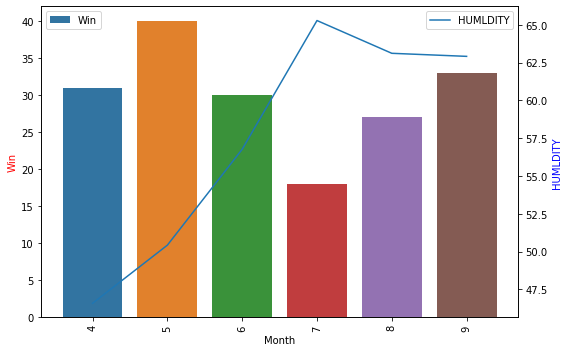

In [88]:
usrNum = data_HH.groupby(['MONTH'])['COUNT'].sum().reset_index()
temp = data_HH[['MONTH','HUMLDITY']]
tempMean = temp.groupby(['MONTH'], as_index=False).mean()

fig, ax1 = plt.subplots(figsize=(8,5))

plt.xticks(rotation=90)

ax2 = sns.barplot(x=usrNum['MONTH'], y=usrNum['COUNT'], label='Win')
ax2.set(xlabel='Month', ylabel='Count')
ax2.set_ylabel('Win', color='r')

ax2.legend(loc=2)
ax2= ax1.twinx()

ax1 = tempMean['HUMLDITY'].plot()
ax1.set(xlabel='DATE', ylabel='HUMLDITY', label='HUMLDITY')
ax1.set_ylabel('HUMLDITY', color='b')

ax1.legend()

fig.tight_layout()
plt.show()

In [60]:
#!pip uninstall tensorflow

In [61]:
#!rm -rf ~/anaconda3/lib/python3.6/site-packages/tensorflow

In [62]:
#!pip install tensorflow

In [14]:
data = pd.read_csv('./totalData.csv')
data['STADIUM'].value_counts()

잠실    405
고척    207
수원    205
광주    201
문학    199
대구    189
대전    186
사직    183
마산    136
창원     67
Name: STADIUM, dtype: int64

In [16]:
data.loc[data['STADIUM'] == '마산', 'STADIUM'] = '창원'

In [18]:
data['STADIUM'].value_counts()

잠실    405
고척    207
수원    205
창원    203
광주    201
문학    199
대구    189
대전    186
사직    183
Name: STADIUM, dtype: int64

In [15]:
new_data=data.iloc[:,[0,1,2,3,4,-4,-3,-2,-1]]

In [16]:
new_data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,25,0,0,65
1,2019,9,30,0,18,26,0,2,52
2,2019,9,29,6,14,27,0,3,79
3,2019,9,29,6,14,27,0,3,37
4,2019,9,29,6,14,28,0,2,50
5,2019,9,29,6,14,27,0,3,31
6,2019,9,28,5,17,26,0,2,74
7,2019,9,28,5,17,26,0,2,64
8,2019,9,28,5,17,28,0,0,67
9,2019,9,28,5,17,28,0,2,41


In [19]:
### team1 
copy_data=data.copy()
team_number={x:n for n,x in enumerate(data.TEAM1.unique())}
location={x:n for n,x in enumerate(data.LOCATION.unique())}
stadium={x:n for n,x in enumerate(data.STADIUM.unique())}

In [22]:
### team1
for t1 in data.TEAM1.unique():
    copy_data.loc[copy_data.TEAM1==t1,'TEAM1']=team_number[t1]
    team1_categorical=pd.DataFrame(np.eye(len(team_number))[copy_data.TEAM1],
                               columns=['team1_'+i for i in team_number.keys()])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
### team2
for t1 in data.TEAM2.unique():
    copy_data.loc[copy_data.TEAM2==t1,'TEAM2']=team_number[t1]
team2_categorical=pd.DataFrame(np.eye(len(team_number))[copy_data.TEAM2],
                               columns=['team2_'+i for i in team_number.keys()])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
### STADIUM
for t1 in data.STADIUM.unique():
    copy_data.loc[copy_data.STADIUM==t1,'STADIUM']=stadium[t1]
stadium_categorical=pd.DataFrame(np.eye(len(stadium))[copy_data.STADIUM],
                               columns=['STADIUM_'+i for i in stadium.keys()])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [103]:
### LOCATION
for t1 in data.LOCATION.unique():
    copy_data.loc[copy_data.LOCATION==t1,'LOCATION']=location[t1]
location_categorical=pd.DataFrame(np.eye(len(location))[copy_data.LOCATION],
                               columns=['LOCATION_'+i for i in location.keys()])


In [107]:
### target
copy_data.loc[data.WINNER==data.TEAM1,'WINNER']='away'
copy_data.loc[data.WINNER=='0']='draw'
copy_data.loc[data.WINNER==data.TEAM2,'WINNER']='home'

In [108]:
categorical=pd.concat([team1_categorical,
          team2_categorical,
          stadium_categorical,
#           location_categorical,
          copy_data.WINNER],1)

In [111]:
one_hot_data=pd.concat([new_data,categorical],1)

In [112]:
one_hot_data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,team1_SK,...,STADIUM_잠실,STADIUM_사직,STADIUM_수원,STADIUM_대구,STADIUM_광주,STADIUM_창원,STADIUM_문학,STADIUM_고척,STADIUM_마산,WINNER
0,2019,9,30,0,18,25,0,0,65,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away
1,2019,9,30,0,18,26,0,2,52,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,home
2,2019,9,29,6,14,27,0,3,79,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away
3,2019,9,29,6,14,27,0,3,37,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,home
4,2019,9,29,6,14,28,0,2,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away
5,2019,9,29,6,14,27,0,3,31,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away
6,2019,9,28,5,17,26,0,2,74,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,home
7,2019,9,28,5,17,26,0,2,64,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,home
8,2019,9,28,5,17,28,0,0,67,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,home
9,2019,9,28,5,17,28,0,2,41,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,home


In [113]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler=StandardScaler()

target_label = one_hot_data['WINNER']
X_train = one_hot_data.drop('WINNER', axis=1)
new_X_train=scaler.fit_transform(X_train)
X_tr, X_vld, y_tr, y_vld = train_test_split(new_X_train, target_label, test_size=0.3, random_state=27)

# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(X_train)
# trx_scale = min_max_scaler.transform(X_tr)
# tsx_scale = min_max_scaler.transform(X_vld)

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [114]:
(prediction==y_vld).mean()

0.5218855218855218

In [85]:
(prediction==y_vld).mean()

0.5218855218855218

In [115]:
model.feature_importances_

array([0.05096315, 0.07185867, 0.13353761, 0.08487694, 0.03406441,
       0.10952747, 0.00281581, 0.06492504, 0.14887096, 0.00989411,
       0.01339834, 0.01280348, 0.01459382, 0.01670383, 0.01331656,
       0.01450968, 0.01490875, 0.01257418, 0.01081927, 0.00566408,
       0.00783298, 0.00756512, 0.00672182, 0.01057918, 0.00982483,
       0.00964649, 0.00859539, 0.00835735, 0.00630434, 0.00724463,
       0.01202839, 0.00740488, 0.01317063, 0.00700837, 0.00778895,
       0.00700963, 0.00701033, 0.00829596, 0.00698459])

In [75]:
model.feature_importances_

array([0.05268824, 0.06874061, 0.12737574, 0.0868424 , 0.03433282,
       0.11439382, 0.00193074, 0.06814341, 0.1404562 , 0.01407239,
       0.01488077, 0.01171522, 0.01498994, 0.01658576, 0.0153346 ,
       0.01196506, 0.01580499, 0.02069364, 0.01534081, 0.00305222,
       0.00363448, 0.00800366, 0.00562785, 0.0086792 , 0.00516366,
       0.00665376, 0.00412551, 0.00425035, 0.0041677 , 0.00332249,
       0.00752658, 0.00607997, 0.00714879, 0.00429142, 0.00631491,
       0.0049837 , 0.00420725, 0.01030563, 0.00630814, 0.00519237,
       0.00665988, 0.00475965, 0.00393018, 0.00531484, 0.00357782,
       0.0076783 , 0.00275251])

In [116]:
pd.DataFrame(np.c_[new_X_train,target_label],columns=one_hot_data.columns).corr()

""


In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(weights='distance')
knn_model.fit(X_tr, y_tr)
knn_pred_tst = knn_model.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld,knn_pred_tst))

정확도 : 0.5555555555555556


In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_tr, y_tr)
y_pred = log_reg.predict(X_vld)

print('정확도 :', metrics.accuracy_score(y_vld, y_pred))

정확도 : 0.5589225589225589


In [78]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split=4)
tree_model.fit(X=X_tr, y=y_tr)
tree_pred = tree_model.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tree_pred))

정확도 : 0.5521885521885522


In [ ]:
feature_importance = tree_model.feature_importances_

Series_feat_imp = Series(feature_importance, index=X_train.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.plot.bar()
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.show()

In [81]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_tr, y_tr)
svm_pred =clf.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, svm_pred))

정확도 : 0.5454545454545454


In [82]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,) ,max_iter=512)
clf.fit(X_tr, y_tr)
tsty_hat = clf.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tsty_hat))


clf2 = MLPClassifier(hidden_layer_sizes=(10,13,10,), max_iter=512)
clf2.fit(X_tr, y_tr)
tsty_hat2 = clf2.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tsty_hat2))

정확도 : 0.45454545454545453
정확도 : 0.5185185185185185


In [83]:
from sklearn.svm import SVC
svc_model = SVC(C=128, kernel='rbf', degree=3, gamma = 0.1, coef0=0.0, shrinking=True,
               probability=True, tol=0.001, cache_size=200,
               class_weight=None, verbose=False, max_iter=-1, decision_function_shape ='ovr', random_state=None)
svc_model.fit(X_tr, y_tr)
tsty_hat = svc_model.predict(X_vld)
print('정확도 :', accuracy_score(y_vld, tsty_hat))

정확도 : 0.5387205387205387


In [52]:
copy_data.apply(lambda x: if x['WINNER'] == x['TEAM1']: 0;else:1 )

SyntaxError: invalid syntax (<ipython-input-52-027fa22a9f43>, line 1)

In [ ]:
copy_data.colu

In [51]:
copy_data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,0,7,0,0,SK,25,0,0,65
1,2019,9,30,0,18,1,6,1,1,LG,26,0,2,52
2,2019,9,29,6,14,2,1,2,2,키움,27,0,3,79
3,2019,9,29,6,14,3,9,3,3,KT,27,0,3,37
4,2019,9,29,6,14,0,7,0,0,SK,28,0,2,50
5,2019,9,29,6,14,4,6,1,1,두산,27,0,3,31
6,2019,9,28,5,17,0,3,4,4,삼성,26,0,2,74
7,2019,9,28,5,17,5,9,3,3,KT,26,0,2,64
8,2019,9,28,5,17,6,8,5,5,KIA,28,0,0,67
9,2019,9,28,5,17,7,4,1,1,두산,28,0,2,41


In [21]:
copy_data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,0,한화,대전,대전,SK,25,0,0,65
1,2019,9,30,0,18,1,LG,잠실,서울,LG,26,0,2,52
2,2019,9,29,6,14,2,롯데,사직,부산,키움,27,0,3,79
3,2019,9,29,6,14,3,KT,수원,수원,KT,27,0,3,37
4,2019,9,29,6,14,0,한화,대전,대전,SK,28,0,2,50
5,2019,9,29,6,14,4,LG,잠실,서울,두산,27,0,3,31
6,2019,9,28,5,17,0,삼성,대구,대구,삼성,26,0,2,74
7,2019,9,28,5,17,5,KT,수원,수원,KT,26,0,2,64
8,2019,9,28,5,17,6,KIA,광주,광주,KIA,28,0,0,67
9,2019,9,28,5,17,7,두산,잠실,서울,두산,28,0,2,41


In [6]:
data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,SK,한화,대전,대전,SK,25,0,0,65
1,2019,9,30,0,18,롯데,LG,잠실,서울,LG,26,0,2,52
2,2019,9,29,6,14,키움,롯데,사직,부산,키움,27,0,3,79
3,2019,9,29,6,14,삼성,KT,수원,수원,KT,27,0,3,37
4,2019,9,29,6,14,SK,한화,대전,대전,SK,28,0,2,50
5,2019,9,29,6,14,두산,LG,잠실,서울,두산,27,0,3,31
6,2019,9,28,5,17,SK,삼성,대구,대구,삼성,26,0,2,74
7,2019,9,28,5,17,NC,KT,수원,수원,KT,26,0,2,64
8,2019,9,28,5,17,LG,KIA,광주,광주,KIA,28,0,0,67
9,2019,9,28,5,17,한화,두산,잠실,서울,두산,28,0,2,41


In [68]:

data['WINNER'] = data['WINNER'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화','0'],
                                        [0,1,2,3,4,5,6,7,8,9,10])

data['TEAM1'] = data['TEAM1'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화'],
                                        [0,1,2,3,4,5,6,7,8,9])

data['TEAM2'] = data['TEAM2'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화'],
                                        [0,1,2,3,4,5,6,7,8,9])

data['STADIUM'] = data['STADIUM'].replace(['창원','마산','잠실','고척','광주','사직','수원','대구','문학','대전'],
                                        [0,0,1,1,3,4,5,6,7,8,9])

data['LOCATION'] = data['LOCATION'].replace(['창원','서울','광주','부산','수원','대구','인천','대전'],
                                        [0,1,4,5,6,7,8,9])

In [69]:
data

,YEAR,MONTH,DAY,WEEKDAY,HOUR,TEAM1,TEAM2,STADIUM,LOCATION,WINNER,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY
0,2019,9,30,0,18,8,9,9,9,8,25,0,0,65
1,2019,9,30,0,18,5,1,2,3,1,26,0,2,52
2,2019,9,29,6,14,3,5,5,5,3,27,0,3,79
3,2019,9,29,6,14,7,6,6,6,6,27,0,3,37
4,2019,9,29,6,14,8,9,9,9,8,28,0,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2017,4,1,5,17,5,0,0,0,5,9,0,2,78
1974,2017,4,1,5,17,6,8,8,8,6,11,0,4,55
1975,2017,4,1,5,14,1,3,3,3,1,13,0,4,34
1976,2017,4,1,5,14,9,2,2,3,9,13,0,4,34


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data= data.fillna(0)
target_label = data['WINNER']
X_train = data.drop('WINNER', axis=1)
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=27)

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [66]:
print("테스트 세트 정확도: ", metrics.accuracy_score( y_vld, prediction))

테스트 세트 정확도:  0.49326599326599324


In [30]:
feature_importance = model.feature_importances_
feature_importance

array([0.0417207 , 0.05908901, 0.11007286, 0.0695741 , 0.02937236,
       0.14986299, 0.10934225, 0.08531363, 0.06966269, 0.09722853,
       0.00125309, 0.06255133, 0.11495646])

In [31]:
from ml_metrics import rmse

rmse(y_vld, prediction)

3.0786546539218196

In [32]:
test_data = pd.read_csv('./totalData20.csv')
test_data= test_data.fillna(0)

test_data['WINNER'] = test_data['WINNER'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화','0'],
                                        [0,1,2,3,4,5,6,7,8,9,10])

test_data['TEAM1'] = test_data['TEAM1'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화'],
                                        [0,1,2,3,4,5,6,7,8,9])

test_data['TEAM2'] = test_data['TEAM2'].replace(['NC','LG','두산','키움','KIA','롯데','KT','삼성','SK','한화'],
                                        [0,1,2,3,4,5,6,7,8,9])

test_data['STADIUM'] = test_data['STADIUM'].replace(['창원','마산','잠실','잠실','고척','광주','사직','수원','대구','문학','대전'],
                                        [0,0,1,2,3,4,5,6,7,8,9])

test_data['LOCATION'] = test_data['LOCATION'].replace(['창원','서울','서울','서울','광주','부산','수원','대구','인천','대전'],
                                        [0,1,2,3,4,5,6,7,8,9])


test_data_label = test_data['WINNER']
X_tes = test_data.drop('WINNER', axis=1)

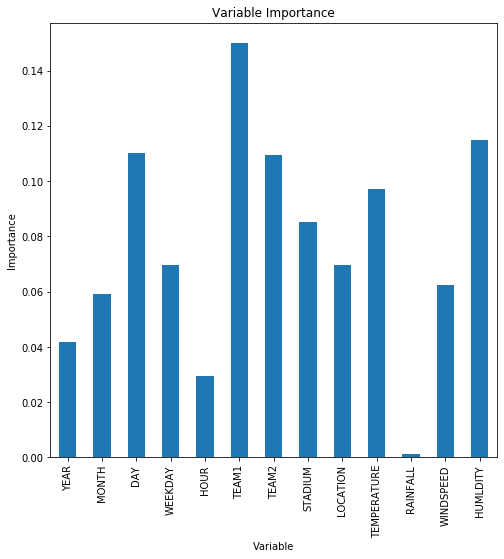

In [33]:
from pandas import Series

feature_importance = model.feature_importances_

Series_feat_imp = Series(feature_importance, index=X_train.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.plot.bar()
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

K_ford = KFold(n_splits=10, shuffle=True, random_state=27)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_tr, y_tr)
knn_pred_tst = knn_model.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld,knn_pred_tst))

정확도 : 0.22895622895622897


In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_tr, y_tr)
y_pred = log_reg.predict(X_vld)

print('정확도 :', metrics.accuracy_score(y_vld, y_pred))

정확도 : 0.23232323232323232


In [79]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split=4)
tree_model.fit(X=X_tr, y=y_tr)
tree_pred = tree_model.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tree_pred))

정확도 : 0.49663299663299665


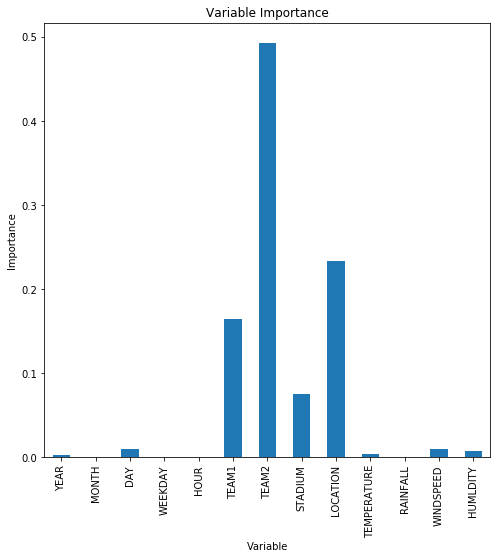

In [83]:
feature_imp = tree_model.feature_importances_

Series_feat_imp = Series(feature_imp, index=X_train.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.plot.bar()
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.show()

In [84]:
feature_imp

array([0.00306673, 0.        , 0.00997188, 0.        , 0.        ,
       0.16492534, 0.49226098, 0.07508196, 0.23361597, 0.00417416,
       0.        , 0.00953802, 0.00736498])

In [77]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_tr, y_tr)
svm_pred =clf.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, svm_pred))    

정확도 : 0.34175084175084175


In [73]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,) ,max_iter=512)
clf.fit(X_tr, y_tr)
tsty_hat = clf.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tsty_hat))


clf2 = MLPClassifier(hidden_layer_sizes=(10,13,10,), max_iter=512)
clf2.fit(X_tr, y_tr)
tsty_hat2 = clf2.predict(X_vld)
print('정확도 :', metrics.accuracy_score(y_vld, tsty_hat2))

정확도 : 0.12626262626262627
정확도 : 0.12121212121212122


In [75]:
from sklearn.svm import SVC
svc_model = SVC(C=128, kernel='rbf', degree=3, gamma = 0.1, coef0=0.0, shrinking=True,
               probability=True, tol=0.001, cache_size=200,
               class_weight=None, verbose=False, max_iter=-1, decision_function_shape ='ovr', random_state=None)
svc_model.fit(X_tr, y_tr)
tsty_hat = svc_model.predict(X_vld)
print('정확도 :', accuracy_score(y_vld, tsty_hat))

정확도 : 0.2053872053872054
